In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
#Method for calculating the Hamiltonian given the current state of the Ising configuration.
def hamiltonian(ising_config):
    H = 0
    for i in range(0,10):
        for j in range(0,10):
            #Take mod 10 in the right and left edge cases - where the indices i,j plus or minus 1 would go off the edge of the 10x10 ising 
            #configuration, we must ensure that they wrap around to the other side of the square.
            H += ising_config[i][j] * (ising_config[(i+1) % 10][j] + ising_config[(i-1) % 10][j] + ising_config[i][(j+1) % 10] + ising_config[i][(j-1) % 10])
            
    return -1/2 * H

#Method that simulates the Ising model over N steps at a given temperature T.
#Params:
#   N - The number of iterations we want to iterate the Ising model over.
#   T - The temperature value we use for our acceptance check.
#   is_cumulative - If true, we store the magnetization values every N = 100, returning an array (used for part a.); if false, we only store
#                   and return a single M value (used for part b. when we vary temperature while N is fixed).
def ising(N, T):
    #1. Create an initial Ising configuration as a 10x10 array of 1s.
    ising_config = np.ones((10,10))
    #Calculate initial Hamiltonian so we can find delta E on the first loop that we run through.
    H_old = hamiltonian(ising_config)
    #Keep track of the sums of all elements in the current ising configuration, and also keep a running total of all these sums in order
    #to determine our Ns later.
    running_ising_sum = np.sum(ising_config)
    #Our array of magnetization values. Will have a single value if varying T (part a.), but many values if we vary N instead (part b.).
    Ms = []
    
    #Loop over N total steps.
    for n in range(1,N+1):
        #2. Randomly flip a spin in the lattice using np.random.
        i = np.random.randint(0,10)
        j = np.random.randint(0,10)
        ising_config[i,j] = -1 * ising_config[i,j]

        #3. Calculate the new Hamiltonian, then take the difference between it and the Hamiltonian from the last iteration.
        H = hamiltonian(ising_config)
        delta_E = H - H_old

        #Update the sum of all elements in our Ising configuration.
        cur_ising_sum = np.sum(ising_config)
        running_ising_sum += cur_ising_sum

        #4. If delta_E < 0, we accept the move; otherwise, we accept the move with probability e^(-delta_E / T). The only time we
        #need to do anything here is if the move is not accepted - in this case, we negate the relevant element of the Ising configuration to
        #undo the change to the array we made earlier. This amounts to checking the contrapositive of the two conditions specified.
        if (delta_E > 0) and (np.random.random() > np.exp(-delta_E / T)):
            ising_config[i,j] = -1 * ising_config[i,j]
        else:
            H_old = H

        # print("delta_E: ", delta_E)
        # print(hamiltonian(ising_config))
        # print(ising_config)

        #Add to our running array of M values if we are looking to vary over N and are on a multiple of 100.
        if (n % 100 == 0):
            Ms.append(1 / n * running_ising_sum)

    return Ms

# Task a.)

Calculate the magnetization 

$< M > = \frac{1}{N} \sum\limits_{i,j \in \Lambda} s_{i,j}$

as a function of the number of Monte Carlo steps $N$. Plot $< M >$ as a function of $N$, where $N$ starts at 0 and ends at 10000 with step size $\Delta N = 100$. Does the magnetization converge to an equilibrium value?

Text(0, 0.5, '<M>')

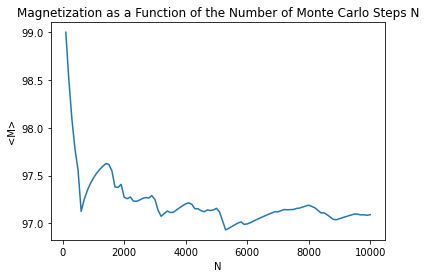

In [45]:
#Calculate magnetization using the ising() function above and plot the results. Use a temperature of T=1.5 here as specified in the task
#description.
Ns = np.arange(100,10100,100)
T = 1.5
Ms = ising(Ns[-1], T)

plt.plot(Ns, Ms)
plt.title("Magnetization as a Function of the Number of Monte Carlo Steps N")
plt.xlabel("N")
plt.ylabel("<M>")

# Task b.)
Scan the temperature $T$ from 1.5 to 3.25 with 10 steps. For each temperate step, $<M>$ is calculated with 10000 MC sampling steps. Plot $<M>$ as a function of $T$.

Text(0, 0.5, '<M>')

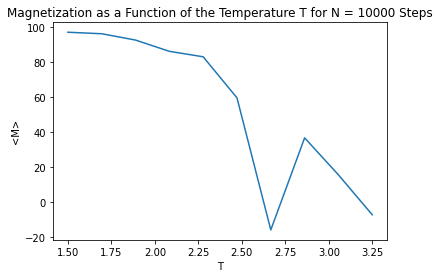

In [44]:
#Calculate magnetization using the ising() function above and plot the results. Use the temperature range given in the task description above.
N_temp = 10000
Ts = np.linspace(1.5, 3.25, 10)
M_finals = []
for T in Ts:
    Ms = ising(N_temp, T)
    M_finals.append(Ms[-1])

plt.plot(Ts, M_finals)
plt.title("Magnetization as a Function of the Temperature T for N = 10000 Steps")
plt.xlabel("T")
plt.ylabel("<M>")